# ***Simple Linear Regression***

In this notebook, we'll build a linear regression model to predict boom-bikes sales using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

#### Import Libraries

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#### Load the dataset

In [180]:
# Load the dataset
df = pd.read_csv("C:/Users/mahes/Downloads/download.csv") 

#### Print out to check if we get the data

In [181]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### Display information and check for Missing Values

In [182]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [183]:
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [184]:
# Checking for missing values
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Step 2: Visualising the Data

Visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `CNT`.

In [185]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\mahes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


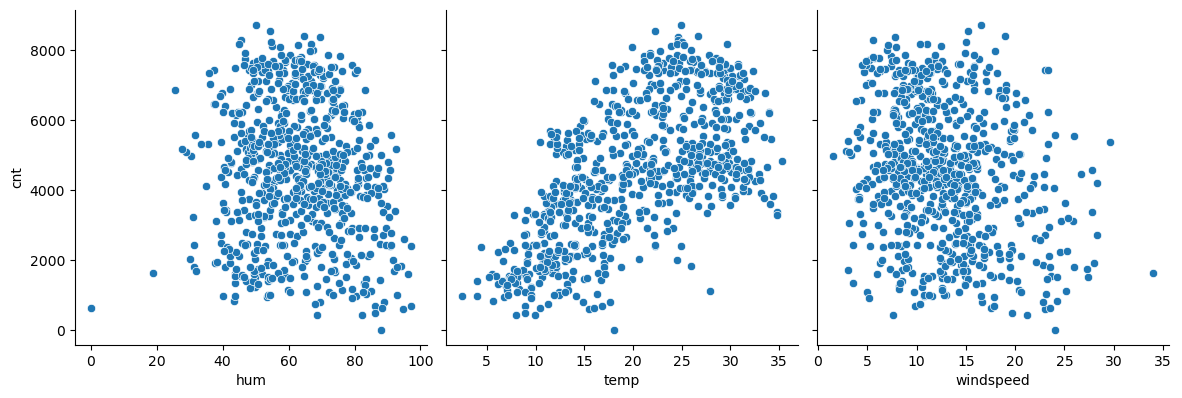

In [186]:
sns.pairplot(df, x_vars=['hum','temp','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

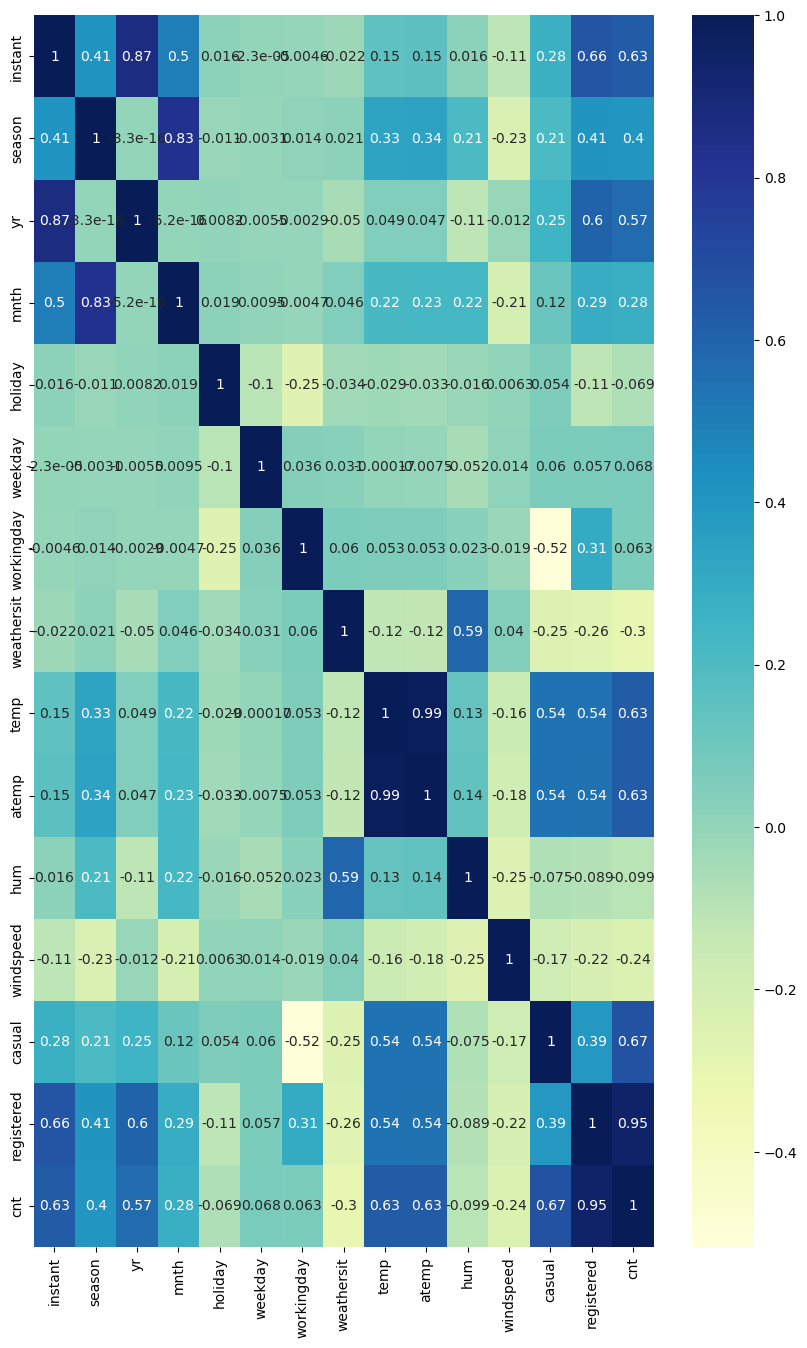

In [187]:
plt.figure(figsize=(10, 16))
sns.heatmap(df.drop(columns = 'dteday').corr(), cmap="YlGnBu", annot = True)
plt.show()

As visible from the pairplot and the heatmap, the variable 'registered' seems to be most correlated with 'cnt'. We have the option to use only the variables with the high correlation values ,however, we'll go ahead and perform simple linear regression using most of the variables.

------
# Step 3: Perform Simple Linear Regression


## Summary

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

## Data Cleaning and Pre-processing

### Convert categorical variables

In [188]:
# Convert categorical variables to appropriate types
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
df['yr'] = df['yr'].map({0: 2018, 1: 2019})

In [189]:
# Drop column dteday or any columns which are not required
df = df.drop(columns = 'dteday')

In [190]:
df = pd.get_dummies(df, drop_first=True)  # Creating dummy variables

## Split data into Independent and Dependent Variables

We first assign the feature variables to the variable `X` and the response variable, `cnt`, to the variable `y`.

In [191]:
# Define independent and dependent variables
X = df.drop(columns=['cnt', 'instant', 'casual', 'registered'])
y = df['cnt']

### Split data - Training and testing datasets

In [192]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size=0.2, random_state=100)

In [193]:
# Let's now take a look at the train dataset

X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist
367,2019,1,0,2,1,6.150000,6.31375,44.1250,24.499957,True,False,False,False,False
648,2019,10,0,4,1,17.835000,21.55835,46.3333,12.166932,False,False,True,False,False
44,2018,2,0,1,1,17.015000,19.91750,37.5833,27.999836,True,False,False,False,False
705,2019,12,0,5,1,13.154153,16.09790,76.4167,8.750200,False,False,True,False,True
379,2019,1,0,0,0,6.833347,8.08125,41.9167,16.834286,True,False,False,False,False


In [194]:
y_train.head()

367    2236
648    7570
44     1913
705    5008
379    2311
Name: cnt, dtype: int64

### Standardization

StandardScaler() is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance. StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

In [195]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building a Linear Model

The `statsmodels` library, by default, fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [196]:
# Add constant term for OLS model
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [197]:
# Fit the regression line using OLS
lin_reg = sm.OLS(y_train, X_train_scaled).fit()

In [198]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lin_reg.params

const    4505.267123
x1        988.809372
x2        -16.292352
x3       -104.172451
x4        160.039758
x5         86.246979
x6        865.370561
x7        134.458620
x8       -156.909856
x9       -254.261861
x10      -286.506463
x11       170.807614
x12       370.087132
x13      -359.153273
x14      -229.668606
dtype: float64

In [199]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     213.2
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          1.29e-215
Time:                        14:38:19   Log-Likelihood:                -4720.0
No. Observations:                 584   AIC:                             9470.
Df Residuals:                     569   BIC:                             9536.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.828    137.238      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

In [200]:
# Extract significant variables
significant_vars = lin_reg.pvalues[lin_reg.pvalues < 0.05]
print("Significant Variables:")
print(significant_vars)

Significant Variables:
const     0.000000e+00
x1       2.375144e-117
x3        2.414468e-03
x4        1.882504e-06
x5        1.127291e-02
x6        9.741863e-04
x8        6.290859e-04
x9        9.522236e-12
x10       3.028237e-04
x11       1.255822e-03
x12       5.378086e-09
x13       5.598970e-21
x14       4.921696e-08
dtype: float64


Significant variable taken as `windspeed`.

##### 1. The coefficient for Windspeed is -254.26, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.84
Meaning that 84.0% of the variance in `CNT` is explained by `Windspeed`

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ CNT = 4505.2671 + -254.2619 \times Windspeed $

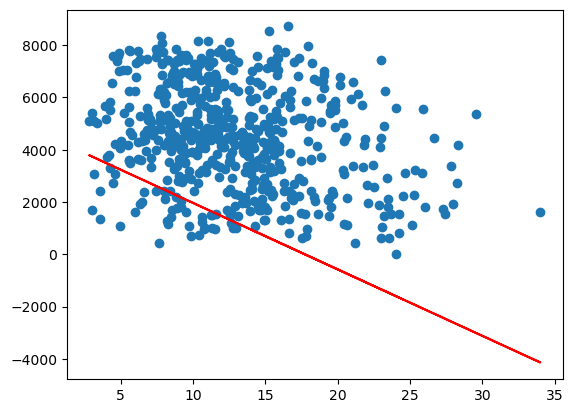

In [201]:
plt.scatter(X_train['windspeed'], y_train)
plt.plot(X_train['windspeed'], 4505.2671 + -254.2619*X_train['windspeed'], 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [202]:
y_train_pred = lin_reg.predict(X_train_scaled)
res = (y_train - y_train_pred)

C:\Users\mahes\AppData\Local\Temp\ipykernel_14632\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


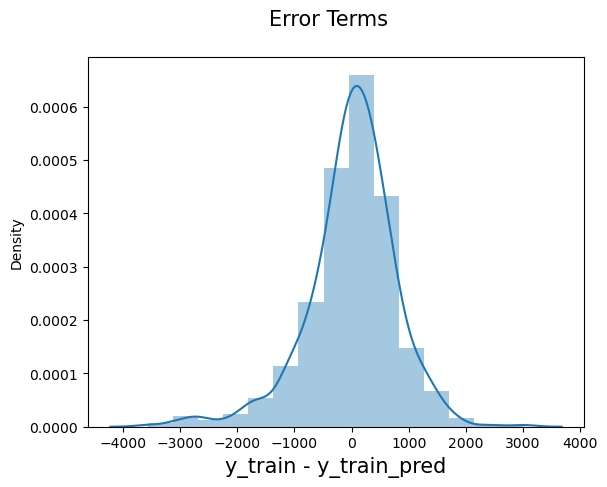

In [203]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

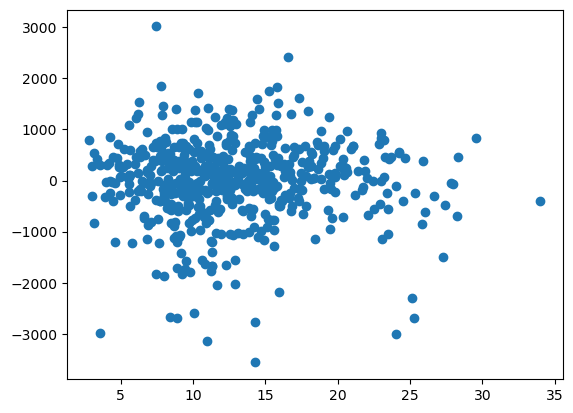

In [204]:
plt.scatter(X_train['windspeed'],res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

## Step 5: Predictions on the test set

In [205]:
# Make predictions

# Add a constant to X_test
#X_test_sm = sm.add_constant(X_test['windspeed'])

#X_test_sm.reshape(-1)
y_pred = lin_reg.predict(X_test_scaled)

In [206]:
y_pred

array([ 3829.40213632,  7932.118595  ,  3750.51838979,  5349.32934174,
        5386.59435635,  3884.52864646,  4810.50781452,  4051.65515381,
        6223.76826799,  5377.46032904,  7265.09436085,  6458.86391309,
        4492.76001096,  6300.52956084,  1563.69095044,  7003.44198506,
        5280.85570699,  1283.61486438,  5403.2149104 ,  5290.17974683,
        7306.68988416,  4764.57646302,  7059.7479771 ,  1425.69143467,
        3853.44990676,  4442.36958479,  6897.52529766,  4475.71741498,
        6358.31640626,  4708.7223344 ,  7566.02093135,  6425.5020363 ,
        3867.12505038,  4958.32178306,  1675.71310469,  4400.76515071,
        4465.67702309,  6386.65792337,  1194.43977597,  3741.62721172,
        4371.9570377 ,  3243.41954131,  6007.45671301,  6042.35039374,
        5429.9147439 ,  7139.58069264,  1483.84012512,  4671.0135689 ,
        5102.43343442,  2726.23730283,  7101.02514281,  4338.87661369,
        4961.37612574,  7237.75950675,  3268.9599124 ,  7748.94144484,
      

In [207]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [208]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

899.1309556617202

###### Checking the R-squared on the test set

In [209]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared score on test set: {r2:.4f}')

R-squared score on test set: 0.7620


##### Visualizing the fit on the test set

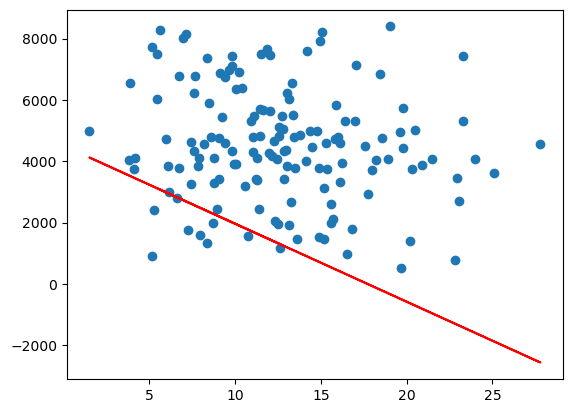

In [210]:
plt.scatter(X_test['windspeed'], y_test)
plt.plot(X_test['windspeed'], 4505.2671 + -254.2619*X_test['windspeed'], 'r')
plt.show()